<a href="https://www.kaggle.com/code/notshrirang/music-recommender-using-pair-similarities?scriptVersionId=112300674" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
songs = pd.read_csv('../input/spotify-million-song-dataset/spotify_millsongdata.csv')

In [3]:
songs.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [4]:
songs = songs.sample(n=20000).drop('link', axis=1).reset_index(drop=True)
songs['text'] = songs['text'].str.replace(r'\n', '', regex=True)

In [5]:
songs.head()

,artist,song,text
0,Everclear,Don't Change,I'm standing here on the ground \rThe sky abo...
1,Waterboys,Meet Me At The Station,Well if I get to heaven before you do \rI wil...
2,Nightwish,Know Why The Nightingale Sings?,What does the free fall feel like? \rAsks the...
3,Wet Wet Wet,World In Another,"Woah, Check it out \rCheck it out \r \rSome..."
4,Hollies,How Do I Survive,How do I survive if you break my heart? \rI'm...


In [6]:
text_input = """Wise men say
Only fools rush in
But I can't help falling in love with you
Shall I stay?
Would it be a sin
If I can't help falling in love with you?
Like a river flows
Surely to the sea
Darling, so it goes
Some things are meant to be
Take my hand
Take my whole life, too
For I can't help falling in love with you
Like a river flows
Surely to the sea
Darling, so it goes
Some things are meant to be
Take my hand
Take my whole life, too
For I can't help falling in love with you
For I can't help falling in love with you"""

In [7]:
songs2: pd.DataFrame = songs.append(songs.iloc[0])
songs2.loc[songs2.index[-1], 'text'] = text_input
songs2.loc[songs2.index[-1], 'song'] = "Input_Song"
songs2

,artist,song,text
0,Everclear,Input_Song,Wise men say\nOnly fools rush in\nBut I can't ...
1,Waterboys,Meet Me At The Station,Well if I get to heaven before you do \rI wil...
2,Nightwish,Know Why The Nightingale Sings?,What does the free fall feel like? \rAsks the...
3,Wet Wet Wet,World In Another,"Woah, Check it out \rCheck it out \r \rSome..."
4,Hollies,How Do I Survive,How do I survive if you break my heart? \rI'm...
...,...,...,...
19996,Ian Hunter,Still The Same,They say that some people never grow up \rLos...
19997,Santana,Novus,I've been searching for freedom \rI've been l...
19998,Weezer,All My Friends Are Insects,I have a friend and it's an earthworm \rIt bu...
19999,Indigo Girls,I Don't Wanna Know,Well you followed me this far \rDid you find ...


In [8]:
documents = [f for f in songs['text']]
tfidf = TfidfVectorizer(analyzer='word', stop_words='english')
lyrics_matrix = tfidf.fit_transform(documents)
# print(lyrics_matrix, lyrics_matrix.shape)

In [9]:
def create_heatmap(similarity, cmap = "YlGnBu"):
  df = pd.DataFrame(similarity)
  df.columns = songs[0:10]['song']
  df.index = songs[0:10]['song']
  fig, ax = plt.subplots(figsize=(5,5))
  sns.heatmap(df, cmap=cmap)

In [10]:
cosine_similarities = cosine_similarity(lyrics_matrix)

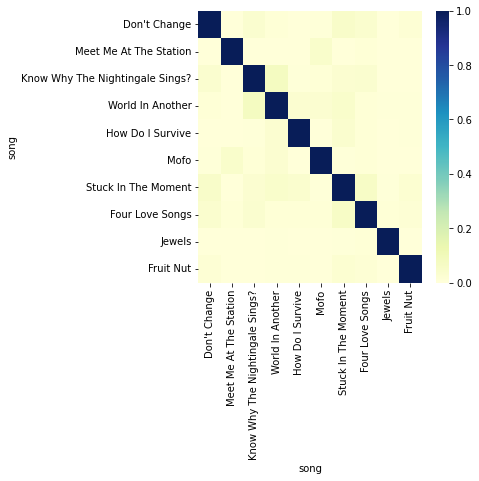

In [11]:
create_heatmap(similarity= cosine_similarities[0:10, 0:10])

In [12]:
similarities = {}

for i in range(len(cosine_similarities)):
    similar_indices = cosine_similarities[i].argsort()[:-50:-1]
    similarities[songs2['song'].iloc[i]] = [(cosine_similarities[i][x], songs2['song'][x], songs2['artist'][x]) for x in similar_indices][1:]

In [13]:
class Recommender:
    def __init__(self, matrix):
        self.matrix_similar = matrix

    def _print_message(self, song, recom_song):
        rec_items = len(recom_song)
        
        print(f'The {rec_items} recommended songs are:')
        for i in range(rec_items):
            print(f"Number {i+1}:")
            print(f"{recom_song[i][1]} by {recom_song[i][2]}")
            print("--------------------")
        
    def recommend(self, recommendation):
        song = recommendation['song']
        number_songs = recommendation['number_songs']
        recom_song = self.matrix_similar[song][:number_songs]
        self._print_message(song=song, recom_song=recom_song)

In [14]:
recommedations = Recommender(similarities)

In [15]:
recommendation2 = {
    "song": songs['song'].iloc[-1],
    "number_songs": 5
}
recommedations.recommend(recommendation2)

The 5 recommended songs are:
Number 1:
The Second Time Around by Michael Bolton
--------------------
Number 2:
The Second Time Around by Luther Vandross
--------------------
Number 3:
Brand New Second Hand by Bob Marley
--------------------
Number 4:
Fields Of Fire by Bon Jovi
--------------------
Number 5:
I Second That Emotion by Diana Ross
--------------------
